In [82]:
import d2d
import importlib
importlib.reload(d2d)
import numpy as np
import tensorflow as tf
import pandas as pd
import random
import os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'
#%matplotlib notebook

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [83]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

In [84]:
SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

linear_model, lstm_model, dnn_model, df_all_chan,  input_columns  = d2d.import_data(filename = file)

da = df_all_chan.to_numpy()

window_input_width = 3000

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                input_width=window_input_width, 
                                                label_width=1, 
                                                shift=0,
                                                label_columns=['Discharge'],
                                                input_columns=input_columns,
                                                shuffle=True,
                                                batch_size=1)

history['lstm_'+str(window_input_width)+'_'+filt] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, patience = 10)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/100
14/14 [==============================] - 28s 2s/step - loss: 3.4943 - mean_absolute_error: 1.4777 - val_loss: 3.7472 - val_mean_absolute_error: 1.7721
Epoch 2/100
14/14 [==============================] - 25s 2s/step - loss: 3.2097 - mean_absolute_error: 1.6323 - val_loss: 0.6849 - val_mean_absolute_error: 0.7169
Epoch 3/100
14/14 [==============================] - 25s 2s/step - loss: 0.3009 - mean_absolute_error: 0.4774 - val_loss: 0.3766 - val_mean_absolute_error: 0.5489
Epoch 4/100
14/14 [==============================] - 26s 2s/step - loss: 0.2271 - mean_absolute_error: 0.3846 - val_loss: 0.1888 - val_mean_absolute_error: 0.3828
Epoch 5/100
14/14 [==============================] - 26s 2s/step - loss: 0.0915 - mean_absolute_error: 0.2226 - val_loss: 0.1175 - val_mean_absolute_error: 0.2504
Epoch 6/100
14/14 [==============================] - 26s 2s/step - loss: 0.0401 - mean_absolute_error: 0.1419 - val_loss: 0.1146 

tf.Tensor(
[[8233.717   8190.8916  8196.83    ...  302.08392  816.8102   787.6638 ]
 [8237.803   8261.992   8281.386   ...  356.15393  813.98895  733.8564 ]
 [8230.443   8222.211   8161.226   ...  298.4613   794.8091   705.2347 ]
 ...
 [8214.079   8165.3853  8195.263   ...  222.73065  741.381    731.4022 ]
 [8227.303   8187.725   8196.232   ...  169.69252  754.8669   833.50525]
 [8207.483   8264.037   8225.722   ...  200.30197  825.71875  857.2174 ]], shape=(3000, 2308), dtype=float32) tf.Tensor([[12.528132]], shape=(1, 1), dtype=float32)


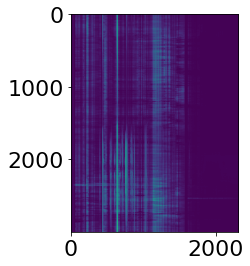

In [81]:
for x, y in multi_step_window_shuffled.training_non_normed:
    print(x[0],y[0])
    plt.imshow(x[0])
    plt.show()
    
    

Text(0.5, 0, 'Epoch')

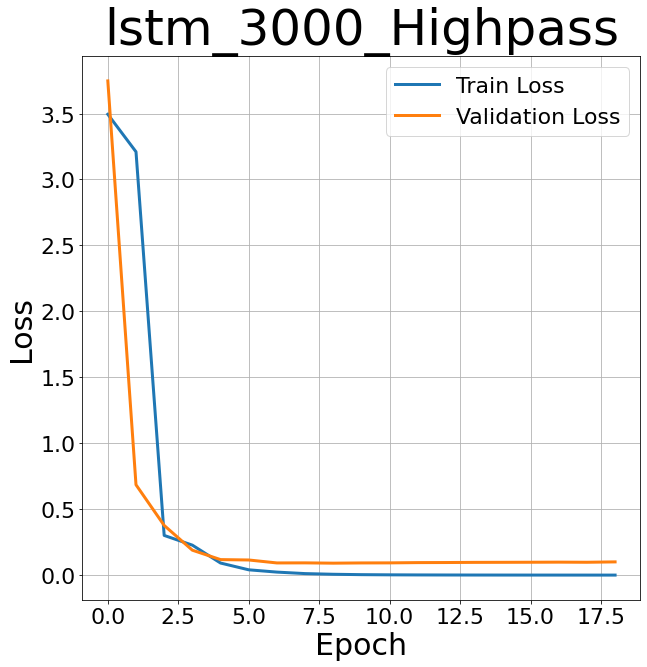

In [85]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(nrows=1,
                         ncols=1, 
                         sharey=False, 
                         sharex=False,
                         figsize=(10,10))

fig.patch.set_facecolor('white')

ax.plot(history['lstm_'+str(window_input_width)+'_'+filt].history['loss'], label='Train Loss',linewidth=3)
ax.plot(history['lstm_'+str(window_input_width)+'_'+filt].history['val_loss'], label='Validation Loss',linewidth=3)
ax.grid(True)
ax.legend()
ax.set_title('lstm_'+str(window_input_width)+'_'+filt ,size=50)
ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)

In [121]:
lstm_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (32, 32)                  299648    
_________________________________________________________________
dense_21 (Dense)             (32, 1)                   33        
Total params: 299,681
Trainable params: 299,681
Non-trainable params: 0
_________________________________________________________________


In [37]:
units=32 #found in the layer compile and model creation e.g. .LSTM(units)
weights = lstm_model.layers[0].get_weights()[0]

input_gate = weights[:, :units]
forget_gate = weights[:, units: units * 2]
cell_state = weights[:, units * 2: units * 3]
output = weights[:, units * 3:]

print(weights.shape)
weights

(2308, 800)


array([[ 0.12904885,  0.01152072,  0.01756504, ..., -0.02599469,
         0.03145394,  0.03627668],
       [ 0.06254019,  0.00362862,  0.00876205, ...,  0.10524266,
         0.01421785, -0.02223654],
       [ 0.08491796,  0.00723531,  0.0677571 , ...,  0.03545713,
        -0.01070129,  0.02804382],
       ...,
       [-0.09089018,  0.00802058, -0.04226069, ..., -0.01509375,
        -0.03093313, -0.00986966],
       [ 0.06968864, -0.0199664 , -0.04567532, ...,  0.04552186,
         0.03188785,  0.00846676],
       [-0.0049156 ,  0.05392966, -0.10467359, ...,  0.1409125 ,
         0.05861117,  0.02669948]], dtype=float32)

In [38]:
# weights.shape

# df_weights = pd.DataFrame(weights).transpose()
# df_weights

In [39]:
print(weights.max())

0.45262644


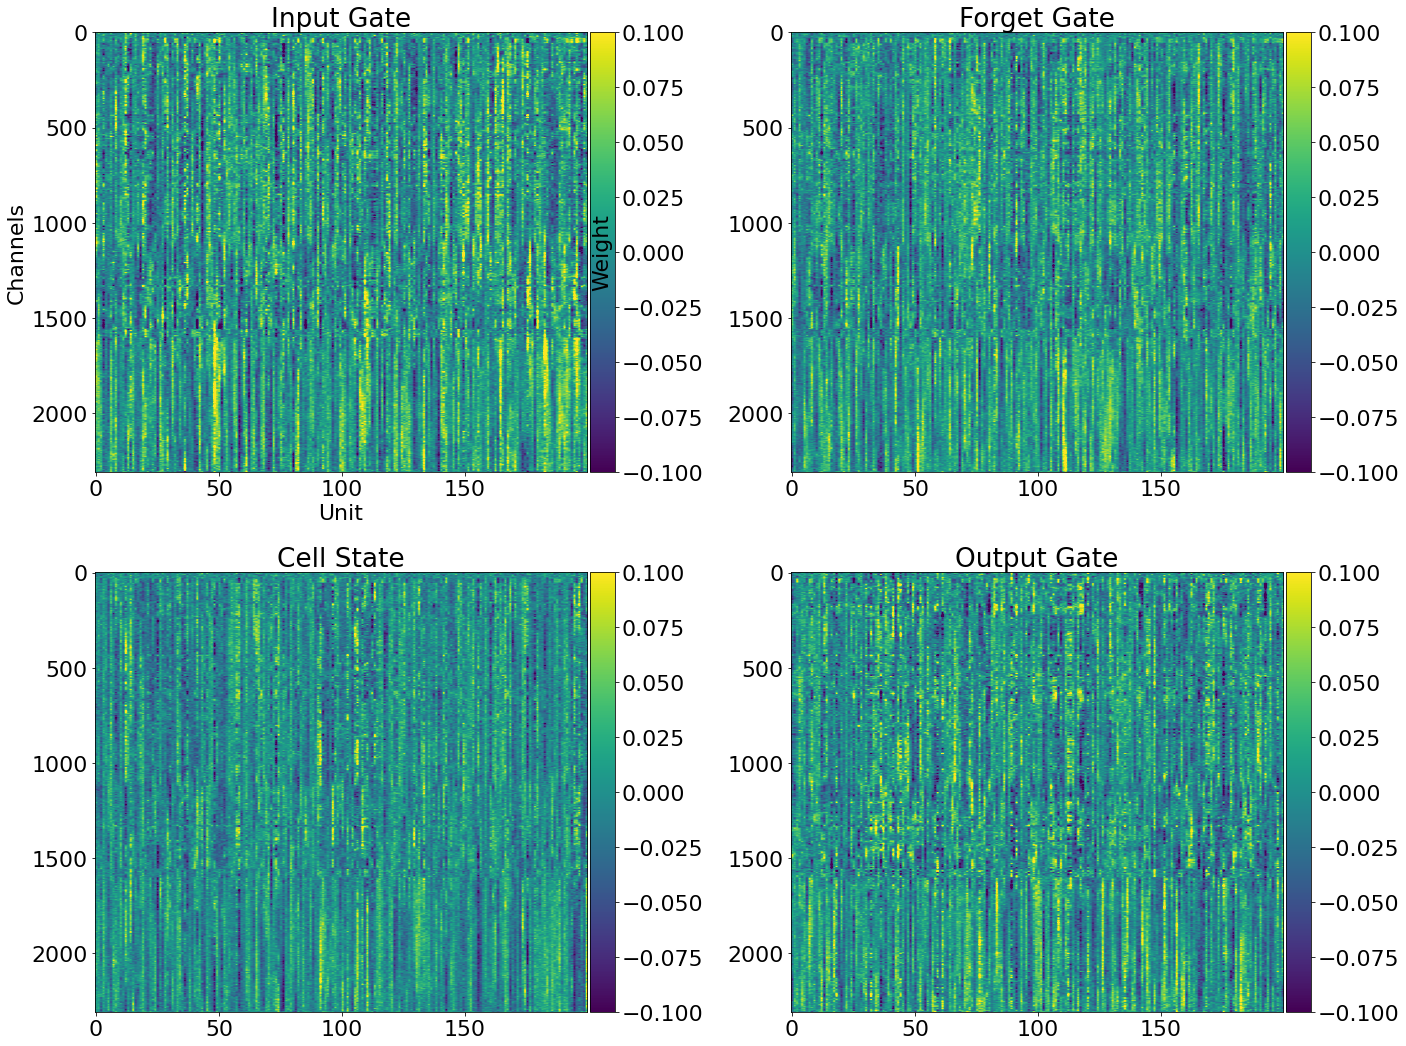

In [40]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(20,15))

ax0 = fig.add_subplot(221)
im0 = ax0.imshow(input_gate, aspect = 'auto', vmin=-.1, vmax=.1)
ax0.set_ylabel('Channels')
ax0.set_xlabel('Unit')
ax0.set_title('Input Gate')

divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
clb = fig.colorbar(im0, cax=cax, orientation='vertical', )
clb.ax.set_ylabel('Weight', labelpad=-111)

ax1 = fig.add_subplot(222)
im1 = ax1.imshow(forget_gate, aspect = 'auto', vmin=-.1, vmax=.1)
ax1.set_title('Forget Gate')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(223)
im2 = ax2.imshow(cell_state, aspect = 'auto', vmin=-.1, vmax=.1)
ax2.set_title('Cell State')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(224)
im3 = ax3.imshow(output, aspect = 'auto', vmin=-.1, vmax=.1)
ax3.set_title('Output Gate')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')


# ax0.set_ylabel('Channels')
# ax0.set_xlabel('LSTM Unit')

# ax0.set_title('Input Weights')
# ax1.set_title('Forget Gate')
# ax2.set_title('Cell State')
# ax3.set_title('Output')

plt.tight_layout()
plt.show()




In [35]:
df_weights.shape
num_of_frames = np.arange(0,df_weights.shape[0])

In [36]:
df_weights.iloc[0].values

array([-0.027144  ,  0.03882783, -0.01842388, ..., -0.05983347,
       -0.05195753, -0.03229532], dtype=float32)

In [232]:
# for col, i in zip(df_weights, list(range(0, 2308,1))):
#     plt.scatter([i]*len(df_weights[col]), df_weights[col])

# plt.yscale('log')

In [352]:
multi_step_window_no_shuffle = d2d.WindowGenerator(df_all_chan,
    input_width=window_input_width, label_width=1, shift=0,
    label_columns=['Discharge'],
    input_columns=input_columns,
    shuffle=False)

/home/jmanos/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [179]:
train_data = []
for i in multi_step_window_no_shuffle.train.as_numpy_iterator():
    train_data.append(i[0])

NameError: name 'multi_step_window_no_shuffle' is not defined

In [354]:
print(len(train_data))
train_data = np.asarray(train_data)

train_data = np.reshape(train_data, (train_data.shape[0]*train_data.shape[1], 5, 2308))

28


ValueError: cannot reshape array of size 103398400 into shape (448,5,2308)

In [180]:
pred_on_test = lstm_model.predict(multi_step_window_shuffled.test)
pred_on_test

array([[ 0.56414324],
       [ 0.22938892],
       [ 0.36270407],
       [ 0.23687273],
       [-0.4350998 ],
       [ 0.58529884],
       [ 0.64200115],
       [ 1.0172305 ],
       [ 2.2973695 ],
       [ 0.687924  ],
       [ 1.1268749 ],
       [-0.1306009 ],
       [-1.0036249 ],
       [-0.6741736 ],
       [-0.6033536 ],
       [-0.2562348 ],
       [-0.49174199],
       [-0.00778075],
       [ 0.4096974 ],
       [ 0.8342727 ],
       [ 0.5312179 ],
       [ 0.31461206],
       [-0.45137727],
       [ 0.7827446 ],
       [ 0.5502688 ]], dtype=float32)

In [182]:
true_dis_test = []

for i in multi_step_window_shuffled.test.as_numpy_iterator():
    true_dis_test.append(i[1])

true_dis_test = np.asarray(true_dis_test)
true_dis_test = true_dis_test.squeeze()

<IPython.core.display.Javascript object>


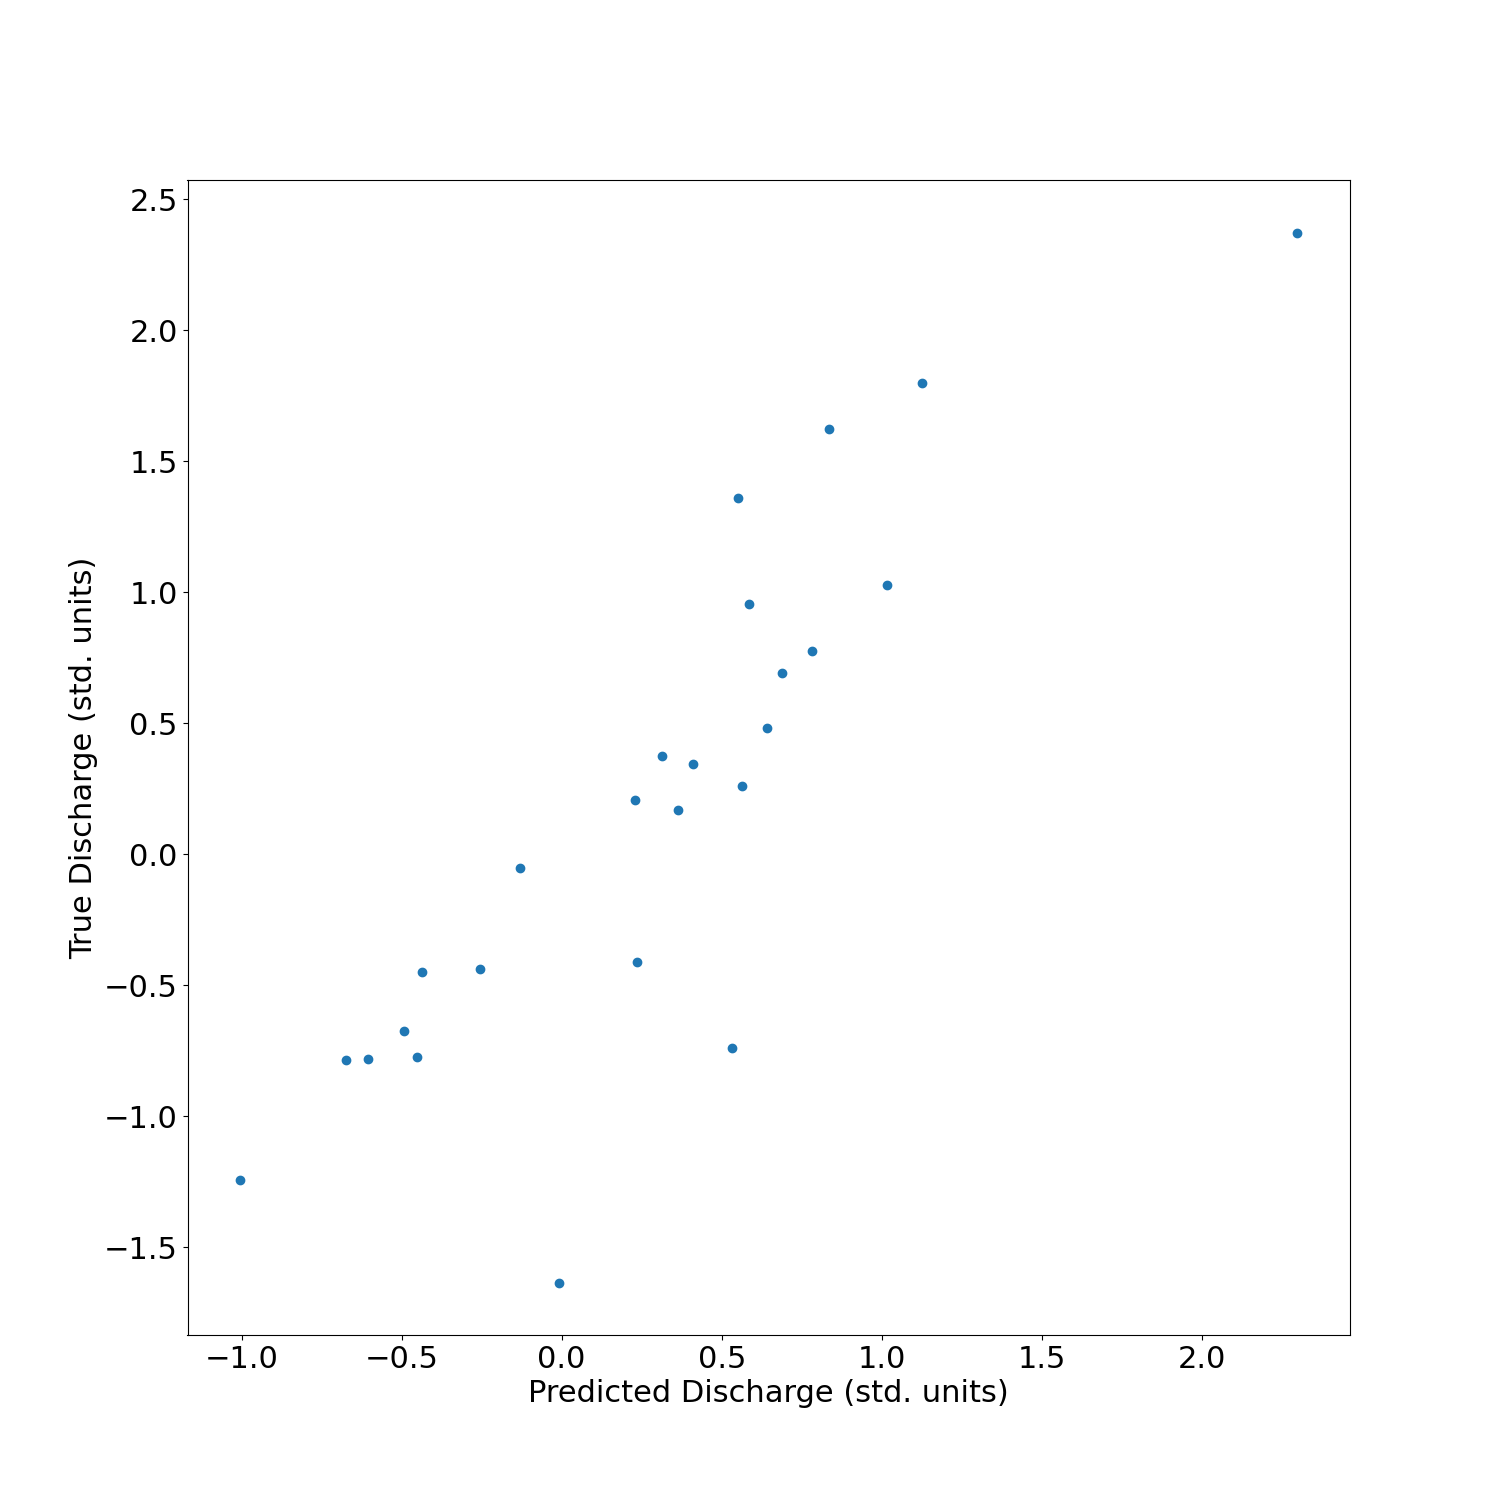

Text(0.5, 0, 'Predicted Discharge (std. units)')

In [183]:
plt.figure(figsize = (15,15), facecolor = 'white')
plt.scatter(pred_on_test, true_dis_test)
#plt.plot([-1.5, 1.5], [-1.5, 1.5])
#plt.ylim([-1.5, 1.5])
#plt.xlim([-1.5, 1.5])
plt.ylabel('True Discharge (std. units)')
plt.xlabel('Predicted Discharge (std. units)')

In [184]:
predictions_test_set = (pred_on_test * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean
discharge_test_set = (true_dis_test * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean

<IPython.core.display.Javascript object>


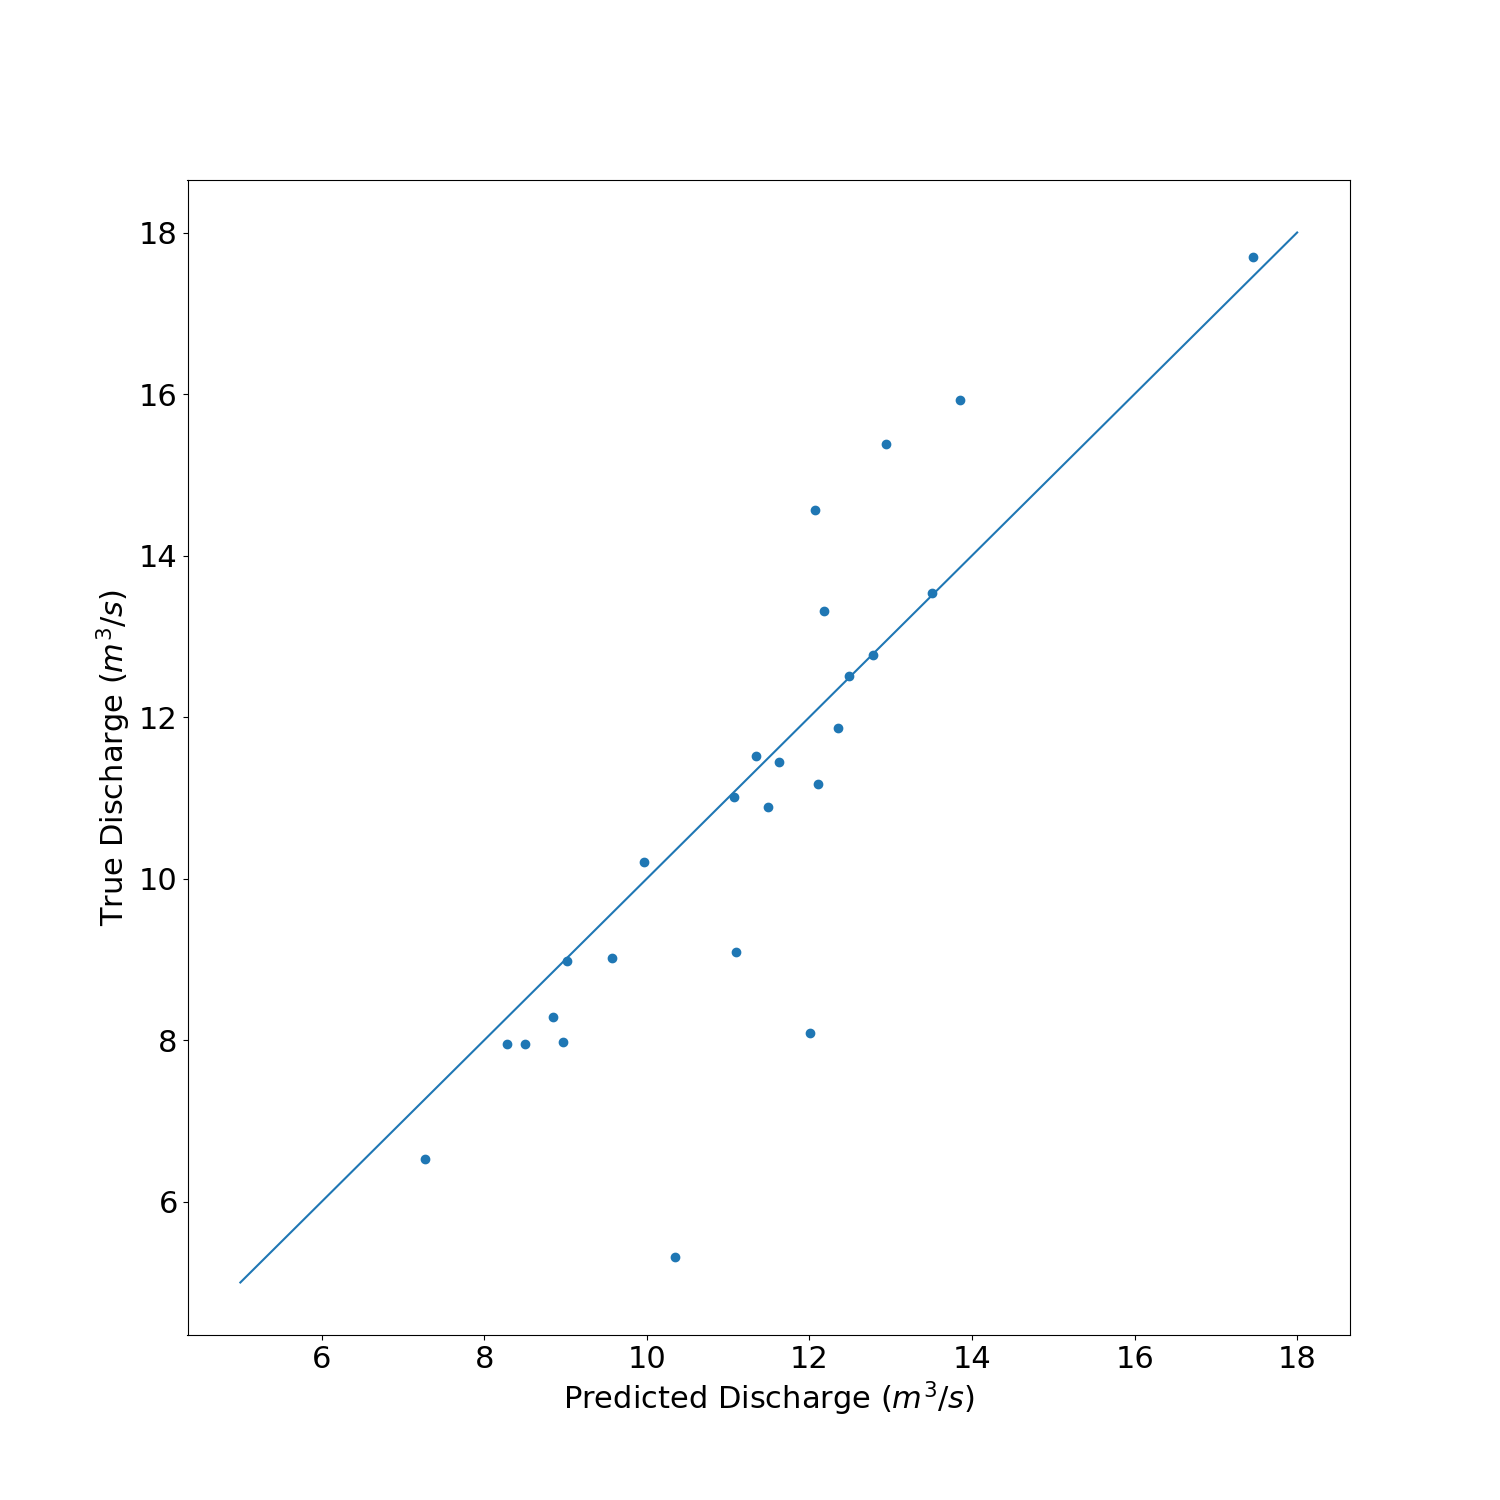

Text(0.5, 0, 'Predicted Discharge ($m^3/s$)')

In [186]:

plt.figure(figsize = (15,15), facecolor = 'white')
plt.scatter(predictions_test_set, discharge_test_set)
plt.plot([5,18], [5,18])
# plt.ylim([6,15])
# plt.xlim([6,15])
plt.ylabel('True Discharge ($m^3/s$)')
plt.xlabel('Predicted Discharge ($m^3/s$)')

In [ ]:
predictions = lstm_model.predict(train_data)

In [ ]:
true_dis = []

for i in multi_step_window_no_shuffle.train.as_numpy_iterator():
    true_dis.append(i[1])

In [ ]:
true_dis = np.asarray(true_dis)
true_dis = np.reshape(true_dis, (8784, 1, 1))
true_dis

In [ ]:
predictions

In [ ]:
true_dis = true_dis.squeeze()

In [ ]:
multi_step_window_shuffled.dis_std

In [ ]:
pred = (predictions * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean
true_discharge = (true_dis * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean

plt.figure(figsize = (20,15), facecolor = 'white')
plt.plot(pred, label = 'Predictions')
plt.plot(true_discharge, label = 'Truth')
plt.ylabel('Discharge $(m^3/s)$')
plt.xlabel('Timestep')
plt.legend()
plt.show()

In [ ]:
plot_range = [3,21]
plt.figure(figsize = (15,15), facecolor = 'white')
plt.scatter(pred, true_discharge)
plt.plot(plot_range, plot_range)
plt.ylim(plot_range)
plt.xlim(plot_range)
plt.ylabel('True Discharge ($m^3/s$)')
plt.xlabel('Predicted Discharge ($m^3/s$)')


In [ ]:
mean_off = np.mean(np.absolute(predictions - true_dis))

In [205]:
mean_off

0.9900706